In [1]:
%load_ext autoreload
%autoreload 2

import copy
import os
import numpy as np
import matplotlib.pyplot as plt

import imageio.v2 as imageio
import tempfile
from IPython.display import Markdown, display, Video
from io import BytesIO

from utils import squared_loss_function, absolute_loss_function, grad_squared_loss_wrt_linear_model, grad_absolute_loss_wrt_linear_model
from utils import create_computation_graph_linear, computation_graph_linear, Arrow3D

from configs import cg_rl_RR as cg

assesment_draw_and_fill = True

# Regression

This assesment targets the regresion problem using craft differentiation. You can use either numpy, pytorch or jax for the assesment but I'd rather recomend using numpy. Derivatives will be computed manually in this work. 

The objective is to perform several regresion problems using different loss functions, different optimization methods and over different problems.

## 1. Regression from $f:\mathbb{R} \rightarrow \mathbb{R}$

We will start a linear model for the following data:

$$
\begin{split}
(x_1,t_1) = (0,0.2)\\
(x_2,t_2) = (1,0.5)\\
(x_3,t_3) = (2,2.8)
\end{split}
$$


### 1.1: Plot data 

**Task**: Create numpy arrays containing the $x$ and $t$ data. This data should be represented as matrices with rows representing each data entry and columns the dimension of the input and output. Plot the data layer using matplotlib

/tmp/ipykernel_642007/58709090.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x_data[i], t_data[i] + cg.y_axis_inc_text_data, f"$(x_{i+1},t_{i+1})=({float(x_data[i])},{float(t_data[i])})$", fontsize=8, ha="center")


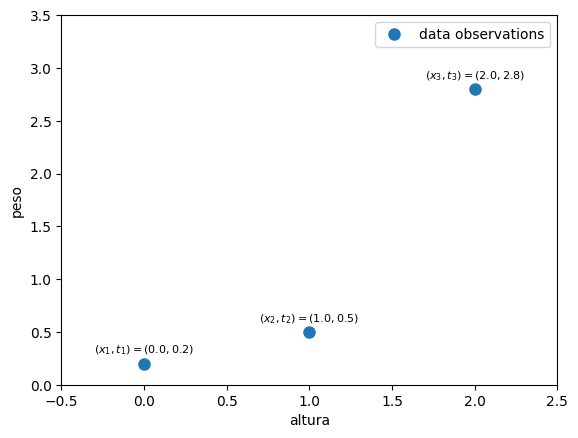

In [2]:
# input to our model. Represents time in seconds
x_data = np.array([0,1,2]).reshape(3,1)
# outputs associated to each input. Represents peso
t_data = np.array([0.2,0.5,2.8]).reshape(3,1)

## display
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
for i in range(len(x_data)):
    plt.text(x_data[i], t_data[i] + cg.y_axis_inc_text_data, f"$(x_{i+1},t_{i+1})=({float(x_data[i])},{float(t_data[i])})$", fontsize=8, ha="center")
plt.xlabel(cg.data_x_name)
plt.ylabel(cg.data_y_name)
plt.ylim([cg.data_y_lim_l,cg.data_y_lim_u])
plt.xlim([cg.data_x_lim_l,cg.data_x_lim_u])
plt.legend()

In [3]:
if assesment_draw_and_fill:
    code = """```python
# input to our model. Represents time in seconds
x_data = np.array(...).reshape(3,1)
# outputs associated to each input. Represents peso.
t_data = np.array(...).reshape(3,1)

## display
plt.plot(...,...,'o', markersize = 8, label = 'data observations')

plt.legend()
```"""
    display(Markdown(code))

```python
# input to our model. Represents time in seconds
x_data = np.array(...).reshape(3,1)
# outputs associated to each input. Represents peso.
t_data = np.array(...).reshape(3,1)

## display
plt.plot(...,...,'o', markersize = 8, label = 'data observations')

plt.legend()
```

### 1.2: Plot possible plaussible linear models explaining this data

A linear model is a model with two parameters $w$ and $b$ which form the following computational graph to predict a possible plaussible value for $t$, which we name $y$ given $x$:

$$
y = x \cdot w  + b
$$

**Task:** Plot 3 possible plaussible linear models, alongside with the data (basically repeat the code in step 1.1). You can choose them manually or generate them randomly. You will need the parameters of these models later in the assesment. You can either save them into your favourite python data structure. Another way to generate them later is to re-seed numpy so that on random generation the same random numbers are generated. 

In [4]:
if assesment_draw_and_fill:
    code = """```python
## ======================================================================= ##
## display possible functions depending on different values of $w$ and $b$ ##
## ======================================================================= ##

## fix seed so that randomness is controlled.
np.random.seed(...)

## number of points in the domain used to plot the functions 
N_points_domain = ...

## display data again
plt.plot(...,...,'o', markersize = 8, label = 'data observations')


## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(3):
    
    # domain over where we want to plot the function implemented by the model.
    x_range = np.linspace(...,..., N_points_domain).reshape((N_points_domain,1))

    # initialize one of our models
    w = ...
    b = ...

    # projection from input x to output y through computational graph
    y_range = ... # w*x + b

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = ... # w*x + b

    if i == 0:
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'linear function' )
    else:
        plt.plot(x_range,y_range, color = f"C{i+1}")

plt.legend(loc = 'upper left')
```"""
    display(Markdown(code))

```python
## ======================================================================= ##
## display possible functions depending on different values of $w$ and $b$ ##
## ======================================================================= ##

## fix seed so that randomness is controlled.
np.random.seed(...)

## number of points in the domain used to plot the functions 
N_points_domain = ...

## display data again
plt.plot(...,...,'o', markersize = 8, label = 'data observations')


## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(3):
    
    # domain over where we want to plot the function implemented by the model.
    x_range = np.linspace(...,..., N_points_domain).reshape((N_points_domain,1))

    # initialize one of our models
    w = ...
    b = ...

    # projection from input x to output y through computational graph
    y_range = ... # w*x + b

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = ... # w*x + b

    if i == 0:
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'linear function' )
    else:
        plt.plot(x_range,y_range, color = f"C{i+1}")

plt.legend(loc = 'upper left')
```

/tmp/ipykernel_642007/1698650643.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x_data[i], t_data[i] + cg.y_axis_inc_text_data, f"$(x_{i+1},t_{i+1})=({float(x_data[i])},{float(t_data[i])})$", fontsize=8, ha="center")  # Etiqueta sobre el punto


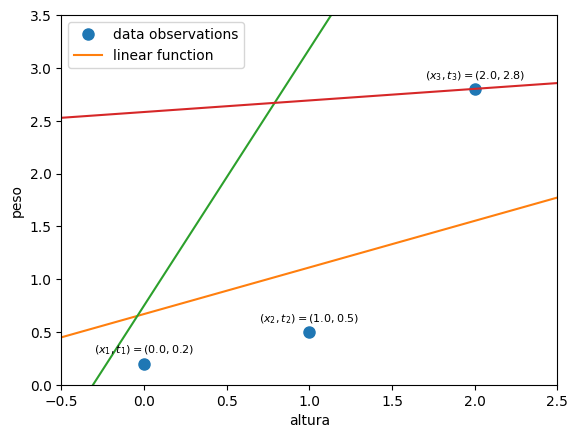

In [5]:
## ======================================================================= ##
## display possible functions depending on different values of $w$ and $b$ ##
## ======================================================================= ##

## fix seed so that randomness is controlled.
np.random.seed(cg.seed)

## number of points in the domain used to plot the functions 
N_points_domain = cg.N_domain_x

# domain over where we want to plot the function implemented by the NNet
x_range = np.linspace(cg.data_x_range_l,cg.data_x_range_u, N_points_domain).reshape((N_points_domain,1))

## display data again
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
for i in range(len(x_data)):
    plt.text(x_data[i], t_data[i] + cg.y_axis_inc_text_data, f"$(x_{i+1},t_{i+1})=({float(x_data[i])},{float(t_data[i])})$", fontsize=8, ha="center")  # Etiqueta sobre el punto
plt.xlabel(cg.data_x_name)
plt.ylabel(cg.data_y_name)
plt.ylim([cg.data_y_lim_l,cg.data_y_lim_u])
plt.xlim([cg.data_x_lim_l,cg.data_x_lim_u])

## =============================================
## Specify input output to the computation graph

# dimensionality of input
Dx = 1
# dimensionality of output
D_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(3):

    # initialize one of our networks
    w, b = create_computation_graph_linear(Dx,D_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = computation_graph_linear(x_data,w,b)

    if i == 0:
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'linear function' )
    else:
        plt.plot(x_range,y_range, color = f"C{i+1}")

plt.legend(loc = 'upper left')

### 1.3 Compute the loss.

We will be targeting two different loss functions: Squared Euclidean distance and Manhatan distance (or Gaussian observation model vs Laplace observation model).

$$
\begin{split}
L_{\text{squared}} = \sum_{n=1}^N (t_n-y_n)^2\\
L_{\text{manhatan}} = \sum_{n=1}^N \left|t_n-y_n\right|\\
\end{split}
$$


**Task:** Create two python functions that implement the above losses. The functions receive vector $t$ and vector $y$ containing all targets and all predictions. Returns another vector containing the loss per pair of elements.

```python
def squared_loss_function(t,y):
    return ...
```

```python
def absolute_loss_function(t,y):
    return ...
```


**Task:** Compute the loss function associated to each of the linear models in step 1.2. Plot it in a figure alongside each of the linear functions. You can also print the values in the console.

In [6]:
if assesment_draw_and_fill:
    code = """```python
## fix seed so that randomness is controlled.
np.random.seed(...)

## number of points in the domain used to plot the functions 
N_points_domain = ...

## domain over where we want to plot the function implemented by the NNet
x_range = np.linspace(...,..., N_points_domain).reshape((N_points_domain,1))

## display data again
fig, ax  = plt.subplots(1,1, figsize=(5,5))  
    
## =========================================================================================
## Create several possible functions that our specific neural network can implement and plot

# to save parameters to use later
w_save = []
b_save = []

for i, model_id in zip(range(3),['a','b','c']):

    # initialize one of our networks
    w = ...
    b = ...

    # projection from input x to output y through computational graph
    y_range = ...

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = ...
    
    # Compute the loss and display:
    loss = ... # call your loss function implemented

    total_loss = ... # the total loss is the sum of per element losses
```"""
    display(Markdown(code))

```python
## fix seed so that randomness is controlled.
np.random.seed(...)

## number of points in the domain used to plot the functions 
N_points_domain = ...

## domain over where we want to plot the function implemented by the NNet
x_range = np.linspace(...,..., N_points_domain).reshape((N_points_domain,1))

## display data again
fig, ax  = plt.subplots(1,1, figsize=(5,5))  
    
## =========================================================================================
## Create several possible functions that our specific neural network can implement and plot

# to save parameters to use later
w_save = []
b_save = []

for i, model_id in zip(range(3),['a','b','c']):

    # initialize one of our networks
    w = ...
    b = ...

    # projection from input x to output y through computational graph
    y_range = ...

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = ...
    
    # Compute the loss and display:
    loss = ... # call your loss function implemented

    total_loss = ... # the total loss is the sum of per element losses
```

/tmp/ipykernel_642007/1434318750.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(x_data[j], y_data[j] + cg.losses[loss_itet].total_loss_display_inc, f"$d(y_{j+1},t_{j+1})={float(loss[j]):.2}$", fontsize=8, ha="center", color = f"C{i+1}")
/tmp/ipykernel_642007/1434318750.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(x_data[j], y_data[j] + cg.losses[loss_itet].total_loss_display_inc, f"$d(y_{j+1},t_{j+1})={float(loss[j]):.2}$", fontsize=8, ha="center", color = f"C{i+1}")


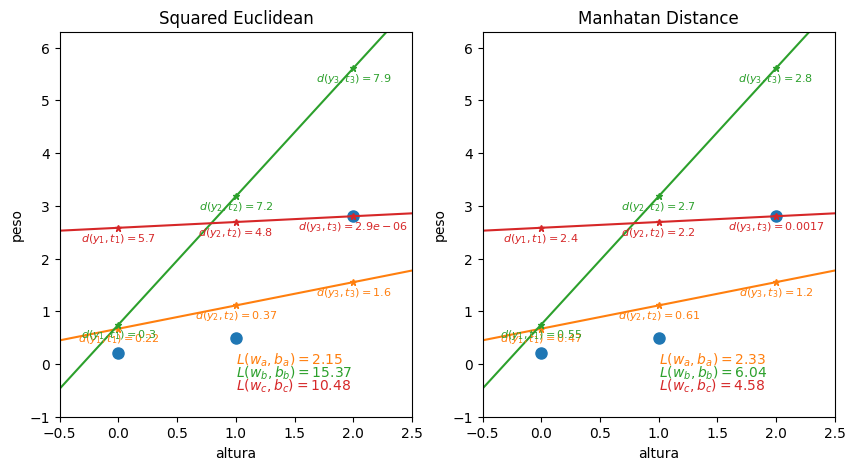

In [7]:
## fix seed so that randomness is controlled.
np.random.seed(cg.seed)

## number of points in the domain used to plot the functions 
N_points_domain = cg.N_domain_x

## domain over where we want to plot the function implemented by the NNet
x_range = np.linspace(cg.data_x_range_l,cg.data_x_range_u, N_points_domain).reshape((N_points_domain,1))

## function input and output dimensions
n_in = 1
n_out = 1

## get number of losses to display
num_losses = len(cg.losses)

## display data again
fig, ax_list = plt.subplots(1,num_losses, figsize=(10,5))

for loss_itet,ax in enumerate(ax_list):
    ax.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
    ax.set_xlabel(cg.data_x_name)
    ax.set_ylabel(cg.data_y_name)
    ax.set_title(cg.losses[loss_itet].loss_name)
    ax.set_ylim([cg.losses[loss_itet].loss_y_lim_l,cg.losses[loss_itet].loss_y_lim_u])
    ax.set_xlim([cg.losses[loss_itet].loss_x_lim_l,cg.losses[loss_itet].loss_x_lim_u])    
    
## =========================================================================================
## Create several possible functions that our specific neural network can implement and plot

# to save parameters to use later
w_save = []
b_save = []

for i, model_id in zip(range(3),['a','b','c']):

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w, b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = computation_graph_linear(x_data,w,b)
    
    # for each of the losses compute the loss and display:
    for loss_itet,ax in enumerate(ax_list):
        
        loss = cg.losses[loss_itet].loss_fun(t_data, y_data)
        
        if i == 0:
            ax.plot(x_data, y_data,'*', markersize = 5, color = f"C{i+1}", label = 'Predictions at training input data')
            ax.plot(x_range,y_range, color = f"C{i+1}", label = 'function on all the domain' )

            for j in range(len(x_data)):
                ax.text(x_data[j], y_data[j] + cg.losses[loss_itet].total_loss_display_inc, f"$d(y_{j+1},t_{j+1})={float(loss[j]):.2}$", fontsize=8, ha="center", color = f"C{i+1}") 

            ax.text(1,cg.losses[loss_itet].total_loss_display_inc*i, f"$L(w_{model_id},b_{model_id}) = {float(np.sum(loss)):.2f}$", color = f"C{i+1}")    

        else:
            ax.plot(x_data, y_data,'*', markersize = 5,  color = f"C{i+1}")
            ax.plot(x_range,y_range, color = f"C{i+1}")

            for j in range(len(x_data)):
                ax.text(x_data[j], y_data[j] + cg.losses[loss_itet].total_loss_display_inc, f"$d(y_{j+1},t_{j+1})={float(loss[j]):.2}$", fontsize=8, ha="center", color = f"C{i+1}")

            ax.text(1,cg.losses[loss_itet].total_loss_display_inc*i, f"$L(w_{model_id},b_{model_id}) = {float(np.sum(loss)):.2f}$", color = f"C{i+1}")    
            

### 1.4 Compute the loss function.

A loss function is a function of the parameters and the data, i.e. we can write:

$$
\begin{split}
L_{\text{squared}}(w,x,t) = \sum_{n=1}^N (t_n-y_n)^2\\
L_{\text{manhatan}}(w,x,t) = \sum_{n=1}^N \left|t_n-y_n\right|\\
\end{split}
$$

**Task:** Fix a value for the bias parameter $b=0.5$, and plot the loss function w.r.t possible plaussible parameter values for $w$. In other words the x axis of the funciton is the parameter $w$ and the y axis its associated loss. For example you can create a vector containing $100$ $w$ values between $-3$ and $2$. Another option is to generate $100$ random values for $w$, compute the loss, and then sort the arrays according to the order of $w$ so that you can plot the function.. You can optionally add a second plot where you plot the linear models corresponding to the losses computed.

In [8]:
if assesment_draw_and_fill:
    code = """```python

## ======================== ##
## Simulation configuration ##
## ======================== ##
fixed_bias = ...

## ================ ##
## For plot display ##
## ================ ##
## create figure box
fig, ax = plt.subplots(1,1, figsize = (10,10))

## ================================================================================
## Create several possible functions that our specific neural network can implement

# to save individual losses, expected losses and parameters used
expected_loss_acc = []

w_acc = []

# Compute the loss function over 100 possible models.

for w in np.linspace(-3,2,100):
    
    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = ...
        
    # compute the loss at the predictions
    loss = ... # use the function you created

    # accumulate the loss and save both individual and accumulated losses
    expected_loss_acc.append(...)
        
    # save parameter used to compute the loss
    w_range.append(np.squeeze(w))

ax.plot(w_range,expected_loss_acc, '*')
ax.plot(w_range,expected_loss_acc)

```"""
    display(Markdown(code))

```python

## ======================== ##
## Simulation configuration ##
## ======================== ##
fixed_bias = ...

## ================ ##
## For plot display ##
## ================ ##
## create figure box
fig, ax = plt.subplots(1,1, figsize = (10,10))

## ================================================================================
## Create several possible functions that our specific neural network can implement

# to save individual losses, expected losses and parameters used
expected_loss_acc = []

w_acc = []

# Compute the loss function over 100 possible models.

for w in np.linspace(-3,2,100):
    
    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = ...
        
    # compute the loss at the predictions
    loss = ... # use the function you created

    # accumulate the loss and save both individual and accumulated losses
    expected_loss_acc.append(...)
        
    # save parameter used to compute the loss
    w_range.append(np.squeeze(w))

ax.plot(w_range,expected_loss_acc, '*')
ax.plot(w_range,expected_loss_acc)

```

In [9]:
## ============================================================================== ##
## display loss as a function of weight parameter (loss incurred by each network) ##
## ============================================================================== ##
## Let's see the associated loss to each possible function but seeing the loss
## as a function of the weight parameter. To do so we fix the bias value.
## We show two different losses: squared (top) and absolute ( bottom )
## I repeat code from above but computing and plotting the loss.


## ======================== ##
## Simulation configuration ##
## ======================== ##
fixed_bias = cg.fixed_bias

## fix seed so that randomness is controlled.
np.random.seed(cg.seed)

## number of points in the domain used to plot the functions 
N_points_domain = cg.N_domain_x

## get number of losses to display
num_losses = len(cg.losses)

## ================ ##
## For plot display ##
## ================ ##
## create figure box
fig, ax_list = plt.subplots(num_losses,2, figsize = (10,10))

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## =============================================
## Specify input output to the computation graph
D_in = 1
D_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement

# to save individual losses, expected losses and parameters used
loss_acc = [[] for i in range(num_losses)]
expected_loss_acc = [[] for i in range(num_losses)]

# domain over where we want to plot the function implemented by the NNet
x_range = np.linspace(cg.data_x_range_l,cg.data_x_range_u, N_points_domain).reshape((N_points_domain,1))

w_acc = []
w_range = []
# Compute the loss function over 100 possible neural net.
for i in range(cg.N_models_simulation):
    
    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w, fixed_bias)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = computation_graph_linear(x_data,w, fixed_bias)

    # for each of the losses:
    for loss_itet,ax in enumerate(ax_list):
        
        # compute the loss at the predictions
        loss = cg.losses[loss_itet].loss_fun(t_data, y_data)
    
        # accumulate the loss and save both individual and accumulated losses
        loss_acc[loss_itet].append(loss)
        expected_loss_acc[loss_itet].append(np.sum(loss))
        
    # save parameter used to compute the loss
    w_range.append(np.squeeze(w))
    w_acc.append(w)

# sort loss and weights to interactive plot later
idx = np.argsort(w_range)
sorted_expected_loss_acc = []
for _ in expected_loss_acc:
    sorted_expected_loss_acc.append(np.array(_)[idx])

## ===================================================================== ##
## Display different models sequentially, alongside its loss, in a video ##

# Display the loss over the possible plaussible functions.
w_old = []
expected_loss_old = [ [] for _ in range(num_losses)]

for i,w in zip(range(cg.N_models_display),w_acc):  
    
    if i == 0 or i == 1 or i == 2:
        color = f"C{i+1}"
    else:
        color = 'C4'
    
    ## repeat the projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w, fixed_bias)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = computation_graph_linear(x_data,w, fixed_bias)
    
    ## for subsequent plotting
    w = np.squeeze(w)
    
    ## ============== ##
    ## Start plotting ##
    ## ============== ##
    
    ## clean up points
    for loss_itet in range(num_losses):
        for ax in ax_list[loss_itet]:
            ax.cla()

    ## display data and loss function
    for loss_itet in range(num_losses):
        
        ## plot data
        ax_1 = ax_list[loss_itet][0]
        ax_1.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
        ax_1.set_xlabel(cg.data_x_name)
        ax_1.set_ylabel(cg.data_y_name)
        ax_1.set_title(cg.losses[loss_itet].loss_name)
        ax_1.set_ylim([cg.losses[loss_itet].loss_y_lim_l,cg.losses[loss_itet].loss_y_lim_u])
        ax_1.set_xlim([cg.losses[loss_itet].loss_x_lim_l,cg.losses[loss_itet].loss_x_lim_u])
        
        ## plot loss function
        ax_2 = ax_list[loss_itet][1]
        ax_2.plot(np.array(w_range)[idx], sorted_expected_loss_acc[loss_itet] )
        ax_2.set_xlabel('weight values')
        ax_2.set_ylabel(cg.losses[loss_itet].loss_name)
        
        ## Plot function
        ax_1.plot(x_data, y_data,'*', markersize = 5, color = color, label = 'Predictions at training input data')
        ax_1.plot(x_range,y_range, color = color, label = 'function on all the domain' )

        ## Plot individual losses
        for j in range(len(x_data)):
            ax_1.text(x_data[j], cg.losses[loss_itet].per_point_loss_display_y_inc, f"$d(y_{j+1},t_{j+1})={float(loss_acc[loss_itet][i][j]):.2}$", fontsize=8, ha="center", color = color) 
    
        ## Plot expected loss
        ax_1.text(cg.losses[loss_itet].total_loss_display_x,cg.losses[loss_itet].total_loss_display_y, f"$L(w = {w:.2f},b = {fixed_bias}) = {expected_loss_acc[loss_itet][i]:.2f}$", color =  color)  
        ax_1.text(cg.losses[loss_itet].total_loss_display_x,cg.losses[loss_itet].total_loss_display_y-2*cg.losses[loss_itet].total_loss_display_inc, f"$y = {w:.2f} \cdot x + {fixed_bias}$", color = color)  
    
        ## Plot already displayed losses
        ax_2.plot(w_old, expected_loss_old[loss_itet], '*', color = 'C0')

        ## Plot the loss in the loss function view
        ax_2.plot(w, expected_loss_acc[loss_itet][i], '*', color = color)
        ax_2.text(w, expected_loss_acc[loss_itet][i]+cg.losses[loss_itet].total_loss_display_loss_plot_inc, f"$L(w = {w:.2f},b = {fixed_bias}) = {expected_loss_acc[loss_itet][i]:.2f}$", color = f"C1")    
   
        # save old loss to display in next figure iteration
        expected_loss_old[loss_itet].append(expected_loss_acc[loss_itet][i])

    # save old to display in next figure
    w_old.append(w)

    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    ## save images for later display
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

/tmp/ipykernel_642007/4211146171.py:141: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax_1.text(x_data[j], cg.losses[loss_itet].per_point_loss_display_y_inc, f"$d(y_{j+1},t_{j+1})={float(loss_acc[loss_itet][i][j]):.2}$", fontsize=8, ha="center", color = color)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 1000) to (1008, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[rawvideo @ 0x41619d00] Stream #0: not enough frames to estimate rate; consider increasing probesize


In [10]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

**Task:** Now plot the loss function w.r.t both parameters $w$ and $b$. Highlight the loss associated to the 3 possible plausible linear models you selected in section 1.2. Simulate a total number of $100$ values for $w$ with corresponding $100$ values for $b$.

In [11]:
if assesment_draw_and_fill:
    code = """```python
## ======================================================================================= ##
## display loss as a function of weight and bias parameter (loss incurred by each network) ##
## ======================================================================================= ##
## Let's see the associated loss to each possible function but seeing the loss
## as a function of the weight and bias parameter. 
## We show two different losses: squared (top) and absolute ( bottom )

## fix seed so that randomness is controlled.
np.random.seed(cg.seed)

## ================ ##
## For plot display ##
## ================ ##
## create figure box
fig, ax = plt.subplots(1,1, figsize = (10,10))

## ===================================================================================================
## Create several possible functions that our specific neural network can implement and compute losses

## To do so we need a mesh
w_mesh, b_mesh = np.meshgrid(
    np.linspace(...,...,100),
    np.linspace(...,...,100)
)

# compute linear projection at all pairs of points
y_data_mesh = ...

# compute loss
expected_loss_mesh = ...
    

## display loss functions
ax.plot_surface(w_mesh, b_mesh, expected_loss_mesh[loss_itet], cmap = 'gray', alpha = 0.75 )

```"""
    display(Markdown(code))

```python
## ======================================================================================= ##
## display loss as a function of weight and bias parameter (loss incurred by each network) ##
## ======================================================================================= ##
## Let's see the associated loss to each possible function but seeing the loss
## as a function of the weight and bias parameter. 
## We show two different losses: squared (top) and absolute ( bottom )

## fix seed so that randomness is controlled.
np.random.seed(cg.seed)

## ================ ##
## For plot display ##
## ================ ##
## create figure box
fig, ax = plt.subplots(1,1, figsize = (10,10))

## ===================================================================================================
## Create several possible functions that our specific neural network can implement and compute losses

## To do so we need a mesh
w_mesh, b_mesh = np.meshgrid(
    np.linspace(...,...,100),
    np.linspace(...,...,100)
)

# compute linear projection at all pairs of points
y_data_mesh = ...

# compute loss
expected_loss_mesh = ...
    

## display loss functions
ax.plot_surface(w_mesh, b_mesh, expected_loss_mesh[loss_itet], cmap = 'gray', alpha = 0.75 )

```

In [12]:
## ======================================================================================= ##
## display loss as a function of weight and bias parameter (loss incurred by each network) ##
## ======================================================================================= ##
## Let's see the associated loss to each possible function but seeing the loss
## as a function of the weight and bias parameter. 
## We show two different losses: squared (top) and absolute ( bottom )

## fix seed so that randomness is controlled.
np.random.seed(cg.seed)

## number of points in the domain used to plot the functions 
N_points_domain = cg.N_domain_x

## get number of losses to display
num_losses = len(cg.losses)

## ================ ##
## For plot display ##
## ================ ##
## create figure box
fig = plt.figure(figsize = (10,10))
ax_list = []
counter = 1
for i in range(num_losses):
    ax_1 = fig.add_subplot(num_losses,2,counter)
    ax_2 = fig.add_subplot(num_losses,2,counter + 1, projection='3d')
    counter += 2
    
    ax_list.append([ax_1,ax_2])

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1

## ===================================================================================================
## Create several possible functions that our specific neural network can implement and compute losses
expected_loss_mesh = []
for loss_itet in range(num_losses):

    ## To do so we need a mesh
    w_mesh, b_mesh = np.meshgrid(
        np.linspace(cg.losses[loss_itet].w_range_l_2d,cg.losses[loss_itet].w_range_u_2d,cg.N_models_simulation),
        np.linspace(cg.losses[loss_itet].b_range_l_2d,cg.losses[loss_itet].b_range_u_2d,cg.N_models_simulation)
    )

    # reshape x_data and t_data for computations. t_data uses broadcasting
    x_data_expanded = x_data[:,np.newaxis]
    t_data_expanded = t_data[:,np.newaxis]

    # compute linear projection at all pairs of points
    y_data_expanded = w_mesh * x_data_expanded + b_mesh

    # compute loss
    expected_loss_mesh.append(np.sum(cg.losses[loss_itet].loss_fun(t_data_expanded, y_data_expanded), axis = 0))
    
# to save individual losses, expected losses and parameters used
loss_acc = [[] for _ in range(num_losses)]
expected_loss_acc = [[] for _ in range(num_losses)]
    
# domain over where we want to plot the function implemented by the NNet
x_range = np.linspace(cg.data_x_range_l,cg.data_x_range_u, N_points_domain).reshape((N_points_domain,1))
    
w_acc = []
w_range = []
b_acc = []
b_range = []

# Compute the loss funciton over some possible models.
for i in range(cg.N_models_display):

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = computation_graph_linear(x_data,w,b)

    for loss_itet in range(num_losses):
        
        # compute loss at the predictions
        loss = cg.losses[loss_itet].loss_fun(t_data, y_data)
        
        # acumulate loss and parameter used
        loss_acc[loss_itet].append(loss)
        expected_loss_acc[loss_itet].append(np.sum(loss))
        
    w_range.append(np.squeeze(w))
    b_range.append(np.squeeze(b))
    w_acc.append(w)
    b_acc.append(b)

## =========================================================
## Display different models sequentially, alongside its loss.
#  The first 3 ones are the ones generated in step 1.2

# variables to keep track of old weight losses display to show the overall loss function.
w_old = []
b_old = []
expected_loss_old = [ [] for _ in range(num_losses)]

for i,w,b in zip(range(len(w_acc)),w_acc,b_acc):  
    
    if i == 0 or i == 1 or i == 2:
        color = f"C{i+1}"
    else:
        color = 'C4'
    
    ## repeat the projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = computation_graph_linear(x_data,w,b)
    
    ## for subsequent plotting
    w = np.squeeze(w)
    b = np.squeeze(b)
    
    ## clean up points
    for loss_itet in range(num_losses):
        for ax in ax_list[loss_itet]:
            ax.cla()

    ## display data and loss function
    for loss_itet in range(num_losses):
        ax_1 = ax_list[loss_itet][0]
        ax_2 = ax_list[loss_itet][1]
        
        ## display data 
        ax_1.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')        
        ax_1.set_xlabel(cg.data_x_name)
        ax_1.set_ylabel(cg.data_y_name)
        ax_1.set_title(cg.losses[loss_itet].loss_name)
        ax_1.set_ylim([cg.losses[loss_itet].loss_y_lim_l,cg.losses[loss_itet].loss_y_lim_u])
        ax_1.set_xlim([cg.losses[loss_itet].loss_x_lim_l,cg.losses[loss_itet].loss_x_lim_u])
        
        ## display loss functions
        ax_2.plot_surface(w_mesh, b_mesh, expected_loss_mesh[loss_itet], cmap = 'gray', alpha = 0.75 )
        ax_2.set_xlabel('weight values')
        ax_2.set_ylabel('bias values')
        ax_2.set_zlabel(cg.losses[loss_itet].loss_name)
        
        ## Plot function
        ax_1.plot(x_data, y_data,'*', markersize = 5, color = color, label = 'Predictions at training input data')
        ax_1.plot(x_range,y_range, color = color, label = 'function on all the domain' )

        ## Plot individual losses
        for j in range(len(x_data)):
            ax_1.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(loss_acc[loss_itet][i][j]):.2}$", fontsize=8, ha="center", color = color) 

        ## Plot expected loss
        ax_1.text(cg.losses[loss_itet].total_loss_display_x,cg.losses[loss_itet].total_loss_display_y, f"$L(w = {w:.2f},b = {b:.2f})= {expected_loss_acc[loss_itet][i]:.2f}$", color = color)  
        ax_1.text(cg.losses[loss_itet].total_loss_display_x,cg.losses[loss_itet].total_loss_display_y-2*cg.losses[loss_itet].total_loss_display_inc, f"$y = {w:.2f} \cdot x + {b:.2f}$", color = color)  

        ## Plot already displayed losses
        ax_2.plot(w_old, b_old, expected_loss_old[loss_itet], '*', color = 'C0')
        
        ## Plot the loss in the loss function view
        ax_2.plot(w, b, expected_loss_acc[loss_itet][i], '*', color = color)
        ax_2.text(w,b,expected_loss_acc[loss_itet][i]+cg.losses[loss_itet].total_loss_display_loss_plot_inc, f"$L(w = {w:.2f},b = {b:.2f}) = {expected_loss_acc[loss_itet][i]:.2f}$", color = color, zorder = 2, ha = 'center')       

        # save old to display in next figure. first 3 models are not added to the old list to not be plotted as old and so that we can highlight them
        # as required.
        expected_loss_old[loss_itet].append(expected_loss_acc[loss_itet][i])
    
    # first 3 models are not added to the old list to not be plotted as old and so that we can highlight them
    # as required.
    w_old.append(w)
    b_old.append(b)
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    ## save images for later display
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)

    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

/tmp/ipykernel_642007/2343192730.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax_1.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(loss_acc[loss_itet][i][j]):.2}$", fontsize=8, ha="center", color = color)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 1000) to (1008, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[rawvideo @ 0x8f6cd00] Stream #0: not enough frames to estimate rate; consider increasing probesize


In [13]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

### 1.5 Compute the gradient of the loss function.

To optimize the loss function w.r.t. the parameters, we need to obtain the gradient of the loss function. 

**Task:** Compute the expressions for these gradients and express them using a mathematical expression:

$$
\begin{split}
\frac{\partial L_{\text{squared}}}{\partial w} = \\
\frac{\partial L_{\text{squared}}}{\partial b} = \\
\frac{\partial L_{\text{manhatan}}}{\partial w} = \\
\frac{\partial L_{\text{manhatan}}}{\partial b} = \\
\end{split}
$$


### 1.6 Implement gradient descent

Run gradient descent on the loss function towards computing the optimal parameters. Draw an iterated simulation where you show the current regression line with its loss in a plot, and in another plot show the loss function and the associated point corresponding to the regression line. Each iteration should show convergence. Do it for both loss functions.

Try different values of the learning rate and see what happens. To implement these steps compute the following tasks.

**Task:** Create two functions (one per loss function) that compute the gradient of the loss function w.r.t the parameters of the model $w$ and $b$.

```python
def grad_squared_loss_wrt_linear_model(x,t,w,b):
    ...
    return grad_w, grad_b

def grad_absolute_loss_wrt_linear_model(x,t,w,b):
    ...
    return grad_w, grad_b
```

### 1.6.1: Fix a value for the bias, and run gradient descent only on the weight $w$.

**Task:** Fix a value of $b=0.5$ and run gradient descent only on the weight. Generate two plots. One plot represents the loss function with the loss corresponding to the weight, and the other plot should represent the points and the function. On each iteration of the algorithm the plots needs to be updated with the new value obtained by gradient descent. Use the %matplotlib tk option so that the plot gets updated.

Try different values of the learning rate, in particular:

lr = $0.1, 0.01, 0.15, 0.21$

Analyze the different behaviours.

Initialize the weight to the value of $w=9$ for squared loss and $w=-2.5$ for the absolute loss. You can further experiment with another initializations.

**Question:** What do you observe when using this learning rates in the squared loss?

**Question:** What do you observe when using this learning rates in the absolute loss?. What you would do?

In [14]:
if assesment_draw_and_fill:
    code = """```python

## ======================== ##
## Simulation configuration ##
## ======================== ##
fixed_bias = ...

## fix seed so that randomness is controlled.
np.random.seed(...)

## number of points in the domain used to plot the functions 
N_points_domain = ...


## ================ ##
## For plot display ##
## ================ ##
## create figure box
fig, (ax11,ax12) = plt.subplots(1,2, figsize = (10,5))


## ============================================
## Get the loss function over which we optimize
w_range = ...

## get predictions for each model
y_data = ...

## compute loss for point of each model
loss_range = ...

## accumulate loss per datapoint
loss_acc_range = ...

## Display different models sequentially, alongside its loss.

# display loss function
ax11.plot(w_range, loss_acc_range, color = 'C0')
ax11.set_xlabel('Weight')
ax11.set_ylabel('Loss')

# Initialize parameters
w = ...


## gradient descent parameters
lr = ...
epochs = ...

for e in range(epochs):

    ## Obtain gradient of the loss wrt the current parameter
    grad_w, _ = ...
    
    ## compute function at current parameter value
    function = ...

    ## compute predictions at current parameter value
    y_data = ...

    ## compute loss at current parameter value
    loss = ...   
    loss_acc = np.sum(...)

    ## ============= ##
    ## ============= ##
    ## START DRAWING ##
    ## ============= ##
    ## ============= ##
    # Clear previous data
    ax11.clear()
    ax12.clear()
    
    ## =========================== ##
    ## prediction function picture ##
    ax12.plot(...,..., color = 'C1', label = 'function: y = w*x')
    ax12.plot(...,...,'o', markersize = 8, label = 'data observations')
    
    ## ===================== ##
    ## loss function picture ##
  
    ## 1. display loss function
    ax11.plot(w_range, loss_acc_range, color = 'C0', label = 'loss', zorder = 20)    
    ax11.set_xlabel('Weight')
    ax11.set_ylabel('Loss')
    
    ## 2. display loss of current weight
    ax11.plot(... , ... , '*', color = 'C1', label = 'current weight', zorder = 50, markersize = 10)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.5)
    
    ## update parameter with gradient descent, for the next update
    w = ...
    
```"""
    display(Markdown(code))
    

```python

## ======================== ##
## Simulation configuration ##
## ======================== ##
fixed_bias = ...

## fix seed so that randomness is controlled.
np.random.seed(...)

## number of points in the domain used to plot the functions 
N_points_domain = ...


## ================ ##
## For plot display ##
## ================ ##
## create figure box
fig, (ax11,ax12) = plt.subplots(1,2, figsize = (10,5))


## ============================================
## Get the loss function over which we optimize
w_range = ...

## get predictions for each model
y_data = ...

## compute loss for point of each model
loss_range = ...

## accumulate loss per datapoint
loss_acc_range = ...

## Display different models sequentially, alongside its loss.

# display loss function
ax11.plot(w_range, loss_acc_range, color = 'C0')
ax11.set_xlabel('Weight')
ax11.set_ylabel('Loss')

# Initialize parameters
w = ...


## gradient descent parameters
lr = ...
epochs = ...

for e in range(epochs):

    ## Obtain gradient of the loss wrt the current parameter
    grad_w, _ = ...
    
    ## compute function at current parameter value
    function = ...

    ## compute predictions at current parameter value
    y_data = ...

    ## compute loss at current parameter value
    loss = ...   
    loss_acc = np.sum(...)

    ## ============= ##
    ## ============= ##
    ## START DRAWING ##
    ## ============= ##
    ## ============= ##
    # Clear previous data
    ax11.clear()
    ax12.clear()
    
    ## =========================== ##
    ## prediction function picture ##
    ax12.plot(...,..., color = 'C1', label = 'function: y = w*x')
    ax12.plot(...,...,'o', markersize = 8, label = 'data observations')
    
    ## ===================== ##
    ## loss function picture ##
  
    ## 1. display loss function
    ax11.plot(w_range, loss_acc_range, color = 'C0', label = 'loss', zorder = 20)    
    ax11.set_xlabel('Weight')
    ax11.set_ylabel('Loss')
    
    ## 2. display loss of current weight
    ax11.plot(... , ... , '*', color = 'C1', label = 'current weight', zorder = 50, markersize = 10)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.5)
    
    ## update parameter with gradient descent, for the next update
    w = ...
    
```

In [15]:
## ========================== ##
## ==== Gradient Descent ==== ##
## ========================== ##
loss_type = 'absolute'

if loss_type not in ['absolute', 'squared']:
    raise RuntimeError("Invalid loss type choose from absolute or square")

## ======================== ##
## Simulation configuration ##
## ======================== ##
fixed_bias = cg.fixed_bias

## fix seed so that randomness is controlled.
np.random.seed(cg.seed)

## number of points in the domain used to plot the functions 
N_points_domain = cg.N_domain_x

## get number of losses to display
num_losses = len(cg.losses)

## ================ ##
## For plot display ##
## ================ ##
## create figure box
fig, (ax11,ax12) = plt.subplots(1,2, figsize = (10,5))
fig.subplots_adjust(wspace=0.5)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## =============================================
## Specify input output to the computation graph
D_in = 1
D_out = 1

## ============================================
## Get the loss function over which we optimize
w_range = np.linspace(cg.losses_named[loss_type].w_range_l,cg.losses_named[loss_type].w_range_u,cg.N_models_simulation).reshape((cg.N_models_simulation,n_in,n_out))

## get predictions for each model
y_data = computation_graph_linear(x_data, w_range, fixed_bias)

## compute loss
loss_range = cg.losses_named[loss_type].loss_fun(t_data, y_data)

## accumulate loss per datapoint
loss_acc_range = np.sum(loss_range, axis = 1)

## squeeze and display
loss_acc_range = np.squeeze(loss_acc_range)
w_range = np.squeeze(w_range)

## Display different models sequentially, alongside its loss.

# display loss function
ax11.plot(w_range, loss_acc_range, color = 'C0')
ax11.set_xlabel('Weight')
ax11.set_ylabel('Loss')

# Initialize parameters
w = np.array([cg.losses_named[loss_type].w_init]).reshape(n_in,n_out)

## gradient descent parameters
lr = 0.21 # try 0.1, 0.01, 0.15, 0.21 to show: fast convergence, slow convergence, convergence with bumping, divergence
epochs = 10

for e in range(epochs):

    ## forward plus backward
    grad_w, _ = cg.losses_named[loss_type].grad_loss_fun(x_data,t_data, w, fixed_bias)
    
    ## compute function at current parameter value
    function = computation_graph_linear(x_range, w, fixed_bias)

    ## compute predictions at current parameter value
    y_data = computation_graph_linear(x_data, w, fixed_bias)

    ## compute loss at current parameter value
    loss = cg.losses_named[loss_type].loss_fun(t_data,y_data)    
    loss_acc = np.sum(loss)

    ## get the gradient function at the point w (tangent at the point)
    gradient_function_w_at_current_w = grad_w * w_range + loss_acc - grad_w * w
    
    ## compute loss on updated parameters
    w_n = w-lr*grad_w
    
    ## function on new parameters
    function_n = computation_graph_linear(x_range, w_n, fixed_bias)
    
    ## predictions with new parameters
    y_data_n = computation_graph_linear(x_data, w_n, fixed_bias)

    ## compute loss at current parameter value
    loss_n = cg.losses_named[loss_type].loss_fun(t_data, y_data_n)
    loss_acc_n = np.sum(loss_n)
    
    ## ============= ##
    ## ============= ##
    ## START DRAWING ##
    ## ============= ##
    ## ============= ##
    # Clear previous data
    ax11.clear()
    ax12.clear()
    
    w_plot = np.squeeze(w)
    w_plot_n = np.squeeze(w_n)
    grad_w_plot = np.squeeze(grad_w)
    x_data_plot = np.squeeze(x_data)
    t_data_plot = np.squeeze(t_data)
    y_data_plot = np.squeeze(y_data)
    y_data_plot_n = np.squeeze(y_data_n)
    loss_plot = np.squeeze(loss)
    loss_plot_n = np.squeeze(loss_n)

    ## =========================== ##
    ## prediction function picture ##
    ax12.plot(x_range,function, color = 'C1', label = 'function: y = w*x')
    ax12.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')

    ## plot loss associated at each point and draw line between dots to highliht what the loss measures
    for idx, (xi, ti, yi, sl) in enumerate(zip(x_data_plot,t_data_plot,y_data_plot,loss_plot)):
        if idx == 0:
            ax12.plot(xi,yi, 'x', color = 'C1', label = 'network prediction')
        else:
            ax12.plot(xi,yi, 'x', color = 'C1')
        ax12.plot([xi,xi], [ti, yi], '--',color = f"C1", alpha = 0.5)
        ax12.text(xi, yi, f'{sl:.2f}', fontsize=12, va='top', color = f"C1" ) 

    # label function with the weight at that moment
    ax12.text(x_range[-20],function[-20], f'w = {w_plot:.2f}', color = 'k', fontsize = 12)
    
    ax12.text(1, 33, f"Iteration {e}, {loss_type} loss = {loss_acc:.2f}", fontsize=12, va='bottom', color = f"C1" ) 
    ax12.set_xlabel(cg.data_x_name)
    ax12.set_ylabel(cg.data_y_name)
    ax12.set_ylim([cg.data_y_lim_l_gd_pred_fun,cg.data_y_lim_u_gd_pred_fun])
    ax12.legend()
    
    ## ===================== ##
    ## loss function picture ##
    ## 0. label and axis limits
    ax11.set_xlabel('Weight')
    ax11.set_ylabel('Loss')
    ax11.set_ylim([cg.losses_named[loss_type].gd_loss_fun_y_lim_l,cg.losses_named[loss_type].gd_loss_fun_y_lim_u])
    ax11.set_xlim([cg.losses_named[loss_type].gd_loss_fun_x_lim_l,cg.losses_named[loss_type].gd_loss_fun_x_lim_u])
          
    ## 1. display loss function
    ax11.plot(w_range, loss_acc_range, color = 'C0', label = 'loss', zorder = 20)    
    
    ## 2. display current weight
    ax11.plot(w_plot, cg.losses_named[loss_type].gd_loss_fun_display_param_y + cg.losses_named[loss_type].gd_loss_fun_display_param_inc_y, '*', color = 'C1', label = 'current weight', zorder = 50, markersize = 10)
    ax11.text(w_plot + 1, cg.losses_named[loss_type].gd_loss_fun_display_param_y + cg.losses_named[loss_type].gd_loss_fun_display_param_inc_y , f"w = {w_plot:.2f}", fontsize=12, va='bottom', color = f"C1" , zorder = 50)
    ax11.legend()    
        
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
    
    ## animation by drawing horizontal lines on current parameter and updated parameter values
    ax11.vlines(np.squeeze(w), ymin=cg.losses_named[loss_type].gd_loss_fun_display_param_y, ymax=loss_acc, color='k', linestyles='dotted', zorder = -50)

    ## 3. display current loss
    ax11.plot(w_plot, loss_acc, 'o', color = 'C0', label = 'loss at current weight', zorder = 20)
    ax11.text(w_plot + 0.5, loss_acc , f"loss = {loss_acc:.2f}", fontsize=12, va='bottom', color = "C0" , zorder = 50)
    ax11.legend()
    
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
    
    ## 4. display the gradient function
    ax11.plot(w_range, np.squeeze(gradient_function_w_at_current_w), color = 'C2', label = 'gradient function: f(w) = grad_w * w + loss - grad_w * w', zorder = 20)
    ax11.text(w_range[-1], np.squeeze(gradient_function_w_at_current_w)[-1], f"grad_w = {grad_w_plot:.2f}", fontsize=12, va='bottom', color = f"C2" , zorder = 200) 
    ax11.legend(loc = 'lower right')
    
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
    
    ## draw rest of lines to show update
    ax11.hlines(y = loss_acc, xmin=w_plot_n, xmax=w_plot, color='k', linestyles='dotted', zorder = -50)
    
    writer.append_data(frame)
    
    ax11.vlines(w_plot_n, ymin=cg.losses_named[loss_type].gd_loss_fun_display_param_y , ymax=loss_acc, color='k', linestyles='dotted', zorder = -50)
    
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 

    ## 5. display new weight
    ax11.plot(w_plot_n, cg.losses_named[loss_type].gd_loss_fun_display_param_y + cg.losses_named[loss_type].gd_loss_fun_display_param_inc_y, '*', color = 'C3', label = 'updated weight: w_new = w - lr*grad_w', zorder = 200, markersize = 10)
    ax11.text(w_plot_n, cg.losses_named[loss_type].gd_loss_fun_display_param_y + 20*cg.losses_named[loss_type].gd_loss_fun_display_param_inc_y, f"w_new = {w_plot:.2f} -{lr:.2f}*{grad_w_plot:.2f} = {w_plot-lr*grad_w_plot:.2f}", fontsize=12, va='bottom', color = f"C3" , zorder = 200) 
    ax11.legend()
        
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
    
    ## 6. display updated function
    ax12.plot(x_range,function_n, color = 'C3')

    ## plot squared loss associated at each point and draw line between dots to highliht what the loss measures
    for idx, (xi, ti, yi, sl) in enumerate(zip(x_data_plot,t_data_plot,y_data_plot_n,loss_plot_n)):
        if idx == 0:
            ax12.plot(xi,yi, 'x', color = 'C3')
        else:
            ax12.plot(xi,yi, 'x', color = 'C3')
        ax12.plot([xi,xi], [ti, yi], '--',color = f"C3", alpha = 0.5)
        ax12.text(xi, yi, f'{sl:.2f}', fontsize=12, va='top', color = f"C3" ) 

    # label function with the weight at that moment
    ax12.text(x_range[5],function_n[5], f'w = {w_plot_n:.2f}; b = {fixed_bias:.2f}', color = 'C3', fontsize = 12)
    
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
    
    ## update parameter with gradient descent, for the next update
    w = w-lr*grad_w
    
writer.close() 
plt.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [16]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

### 1.6.2: Run gradient descent on the full model.

**Task:** Similar to the previous step but now optimize both $b$ and $w$. Use the following initializations

* squared loss: $w=-5$, $b=-10$
* absolute loss: $w=-9$, $b=-3$

In [17]:
if assesment_draw_and_fill:
    code = """```python
    
## create figure box
fig = plt.figure(figsize = (10,5))
ax11 = fig.add_subplot(121, projection='3d')
ax12 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0.5)

## ================================================================================
## Create several possible functions that our specific neural network can implement
## first of all draw loss function against a set of parameters

## To do so we need a mesh
w_mesh, b_mesh = np.meshgrid(
    np.linspace(...,...,100),
    np.linspace(...,...,100)
)

# compute linear projection at all pairs of points
y_data_mesh = ...

# compute loss summed over all points
loss_acc_mesh = ...

ax11.plot_surface(w_mesh, b_mesh, loss_acc_mess, cmap = 'gray')
ax11.set_xlabel('weight values')
ax11.set_ylabel('bias values')
ax11.set_zlabel(f'{loss_type} loss function')

# Initialize parameters
w = ...
b = ...

## gradient descent parameters
lr = ...
epochs = ...

for e in range(epochs):

    ## forward plus backward
    grad_w, grad_b = ...

    ## compute function at current parameter value
    function = ...

    ## compute predictions at current parameter value
    y_data = ...

    ## compute loss at current parameter value
    loss = ...
        
    loss_acc = ...
    
    
    ## ============= ##
    ## ============= ##
    ## START DRAWING ##
    ## ============= ##
    ## ============= ##
    # Clear previous data
    ax11.clear()
    ax12.clear()
    
    ## ================ ##
    ## function picture ##
    ax12.plot(x_range,function, color = 'C1', label = 'function: y = w*x + b')
    ax12.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
    ax12.legend()
    
    ## ===================== ##
    ## loss function picture ##
    
    ## 1. display loss function
    ax11.plot_surface(w_mesh, b_mesh, loss_acc_mesh, cmap = 'gray')
    
    ## 2. display current weight
    ax11.plot(w_plot, b_plot, loss_acc, 'o', color = 'C1', label = 'current weight', zorder = 50, markersize = 5)
    ax11.legend()
   
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.5)
    
    ## update parameter with gradient descent, for the next update
    w = ...
    b = ...
    
```"""
    display(Markdown(code))

```python
    
## create figure box
fig = plt.figure(figsize = (10,5))
ax11 = fig.add_subplot(121, projection='3d')
ax12 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0.5)

## ================================================================================
## Create several possible functions that our specific neural network can implement
## first of all draw loss function against a set of parameters

## To do so we need a mesh
w_mesh, b_mesh = np.meshgrid(
    np.linspace(...,...,100),
    np.linspace(...,...,100)
)

# compute linear projection at all pairs of points
y_data_mesh = ...

# compute loss summed over all points
loss_acc_mesh = ...

ax11.plot_surface(w_mesh, b_mesh, loss_acc_mess, cmap = 'gray')
ax11.set_xlabel('weight values')
ax11.set_ylabel('bias values')
ax11.set_zlabel(f'{loss_type} loss function')

# Initialize parameters
w = ...
b = ...

## gradient descent parameters
lr = ...
epochs = ...

for e in range(epochs):

    ## forward plus backward
    grad_w, grad_b = ...

    ## compute function at current parameter value
    function = ...

    ## compute predictions at current parameter value
    y_data = ...

    ## compute loss at current parameter value
    loss = ...
        
    loss_acc = ...
    
    
    ## ============= ##
    ## ============= ##
    ## START DRAWING ##
    ## ============= ##
    ## ============= ##
    # Clear previous data
    ax11.clear()
    ax12.clear()
    
    ## ================ ##
    ## function picture ##
    ax12.plot(x_range,function, color = 'C1', label = 'function: y = w*x + b')
    ax12.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
    ax12.legend()
    
    ## ===================== ##
    ## loss function picture ##
    
    ## 1. display loss function
    ax11.plot_surface(w_mesh, b_mesh, loss_acc_mesh, cmap = 'gray')
    
    ## 2. display current weight
    ax11.plot(w_plot, b_plot, loss_acc, 'o', color = 'C1', label = 'current weight', zorder = 50, markersize = 5)
    ax11.legend()
   
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.5)
    
    ## update parameter with gradient descent, for the next update
    w = ...
    b = ...
    
```

In [18]:
## ======================================================================================= ##
## display loss as a function of weight and bias parameter (loss incurred by each network) ##
## ======================================================================================= ##
## Let's see the associated loss to each possible function but seeing the loss
## as a function of the weight and bias parameter. 
## We show two different losses: squared (top) and absolute ( bottom )
loss_type = 'absolute'

if loss_type not in ['absolute', 'squared']:
    raise RuntimeError("Invalid loss type choose from absolute or square")

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")    
    
## create figure box
fig = plt.figure(figsize = (10,5))
ax11 = fig.add_subplot(121, projection='3d')
#ax11.view_init(elev=25, azim=-30)
ax12 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0.5)

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement
## first of all draw loss function against a set of parameters

## To do so we need a mesh
w_mesh, b_mesh = np.meshgrid(
    np.linspace(cg.losses_named[loss_type].w_range_l_2d,cg.losses_named[loss_type].w_range_u_2d,cg.N_models_simulation),
    np.linspace(cg.losses_named[loss_type].b_range_l_2d,cg.losses_named[loss_type].b_range_u_2d,cg.N_models_simulation)
)

# reshape x_data and t_data for computations. t_data uses broadcasting.
x_data_expanded = x_data[:,np.newaxis]
t_data_expanded = t_data[:,np.newaxis]

# compute linear projection at all pairs of points
y_data_expanded = w_mesh*x_data_expanded + b_mesh

# compute loss
loss_acc_mesh = np.sum(cg.losses_named[loss_type].loss_fun(t_data_expanded, y_data_expanded), axis = 0)

ax11.plot_surface(w_mesh, b_mesh, loss_acc_mesh, cmap = 'gray')
ax11.set_xlabel('weight values')
ax11.set_ylabel('bias values')
ax11.set_zlabel(f'{loss_type} loss function')

# Initialize parameters
w = np.array([cg.losses_named[loss_type].w_init_full]).reshape(n_in,n_out)
b = np.array([cg.losses_named[loss_type].b_init_full])

## gradient descent parameters
lr = 0.01 # try 0.1, 0.01, 0.15, 0.21 to show: fast convergence, slow convergence, convergence with bumping, divergence
# lr absolute = 0.5
epochs = 20

for e in range(epochs):

    ## forward plus backward
    grad_w, grad_b = cg.losses_named[loss_type].grad_loss_fun(x_data,t_data, w, b)

    ## compute function at current parameter value
    function = computation_graph_linear(x_range, w, b)

    ## compute predictions at current parameter value
    y_data = computation_graph_linear(x_data, w, b)

    ## compute loss at current parameter value
    loss = cg.losses_named[loss_type].loss_fun(t_data, y_data)
        
    loss_acc = np.sum(loss)
    
    ## compute loss on updated parameters
    w_n = w-lr*grad_w
    b_n = b-lr*grad_b
    
    ## function on new parameters
    function_n = computation_graph_linear(x_range, w_n, b_n)
    
    ## predictions with new parameters
    y_data_n = computation_graph_linear(x_data, w_n, b_n)

    ## compute loss at current parameter value
    loss_n = cg.losses_named[loss_type].loss_fun(t_data, y_data_n)

    loss_acc_n = np.sum(loss_n)
    
    ## ============= ##
    ## ============= ##
    ## START DRAWING ##
    ## ============= ##
    ## ============= ##
    # Clear previous data
    ax11.clear()
    ax12.clear()
    
    w_plot = np.squeeze(w)
    b_plot = np.squeeze(b)
    
    w_plot_n = np.squeeze(w_n)
    b_plot_n = np.squeeze(b_n)

    x_data_plot = np.squeeze(x_data)
    t_data_plot = np.squeeze(t_data)
    y_data_plot = np.squeeze(y_data)
    y_data_plot_n = np.squeeze(y_data_n)
    loss_plot = np.squeeze(loss)
    loss_plot_n = np.squeeze(loss_n)
    
    ## ================ ##
    ## function picture ##
    ax12.plot(x_range,function, color = 'C1', label = 'function: y = w*x + b')
    ax12.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')

    ## plot squared loss associated at each point and draw line between dots to highliht what the loss measures
    for idx, (xi, ti, yi, sl) in enumerate(zip(x_data_plot,t_data_plot,y_data_plot,loss_plot)):
        if idx == 0:
            ax12.plot(xi,yi, 'x', color = 'C1', label = 'network prediction')
        else:
            ax12.plot(xi,yi, 'x', color = 'C1')
        ax12.plot([xi,xi], [ti, yi], '--',color = f"C1", alpha = 0.5)
        ax12.text(xi, yi, f'{sl:.2f}', fontsize=12, va='top', color = f"C1" ) 

    # label function with the weight at that moment
    ax12.text(x_range[-20],function[-20], f'w = {w_plot:.2f}; b = {b_plot:.2f}', color = 'C1', fontsize = 12)
    
    ax12.text(1, 33, f"Iteration {e}, {cg.losses_named[loss_type].loss_name} = {loss_acc:.2f}", fontsize=12, va='bottom', color = f"C1" ) 
    ax12.set_xlabel(cg.data_x_name)
    ax12.set_ylabel(cg.data_y_name)
    ax12.set_ylim([cg.data_y_lim_l_gd_pred_fun,cg.data_y_lim_u_gd_pred_fun])
    ax12.legend()
    
    ## ===================== ##
    ## loss function picture ##
    
    ## 1. display loss function
    ax11.plot_surface(w_mesh, b_mesh, loss_acc_mesh, cmap = 'gray')
    ax11.set_xlabel('weight values')
    ax11.set_ylabel('bias values')
    ax11.set_zlabel(f'{cg.losses_named[loss_type].loss_name} loss function')
    
    ## 2. display current weight
    ax11.plot(w_plot, b_plot, loss_acc, 'o', color = 'C1', label = 'current weight', zorder = 50, markersize = 5)
    ax11.text(w_plot, b_plot, loss_acc, f"(w,b) = ({w_plot:.2f},{b_plot:.2f})", fontsize=12, va='bottom', color = f"C1" , zorder = 50)
    ax11.legend()
    
    ## save image frame
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)
    
    ## 3. display the gradient arrow and updated weight
    a = Arrow3D([w_plot, w_plot_n], [b_plot, b_plot_n], [loss_acc, loss_acc_n],
                mutation_scale=20, lw=0.5, arrowstyle="-|>", color="C0")
    ax11.add_artist(a)
    ax11.legend()

    ## 4. display new weight
    ax11.plot(w_plot_n, b_plot_n, loss_acc_n, 'o', color = 'C3', label = 'updated weight', zorder = 50, markersize = 5)
    ax11.text(w_plot_n, b_plot_n, loss_acc_n, f"(w_new,b_new) = ({w_plot_n:.2f},{b_plot_n:.2f})", fontsize=12, va='bottom', color = f"C3" , zorder = 50)
    ax11.legend()
    
    ## save image frame
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)
    
    ## 6. display updated function
    ax12.plot(x_range,function_n, color = 'C3')
    ax12.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')

    ## plot squared loss associated at each point and draw line between dots to highliht what the loss measures
    for idx, (xi, ti, yi, sl) in enumerate(zip(x_data_plot,t_data_plot,y_data_plot_n,loss_plot_n)):
        if idx == 0:
            ax12.plot(xi,yi, 'x', color = 'C3')
        else:
            ax12.plot(xi,yi, 'x', color = 'C3')
        ax12.plot([xi,xi], [ti, yi], '--',color = f"C3", alpha = 0.5)
        ax12.text(xi, yi, f'{sl:.2f}', fontsize=12, va='top', color = f"C3" ) 

    # label function with the weight at that moment
    ax12.text(x_range[5],function_n[5], f'w = {w_plot_n:.2f}; b = {b_plot_n:.2f}', color = 'C3', fontsize = 12)
    
    ## save image frame
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame) 
    
    ## update parameter with gradient descent, for the next update
    w = w-lr*grad_w
    b = b-lr*grad_b
    
writer.close() 
plt.close()


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [19]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

### 1.7 Compute optimal solution

With the squared loss function we now that the optimal parameters $w$ and $b$ can be obtained by solving the following linear system of equations:

$$
\begin{pmatrix}
\frac{\partial L_{\text{squared}}}{\partial w} = 0 \\
\frac{\partial L_{\text{squared}}}{\partial b} = 0 \\
\end{pmatrix}
$$

which gives optimal parameters:

$$
\begin{split}
\hat{w} = \frac{\mathbb{COV}[x,t]}{\mathbb{VAR}[x]}\\
\hat{b} = \mathbb{E}[t] - \hat{w}\mathbb{E}[x]
\end{split}
$$

**Task:**  Compare the output of gradient descent with the optimal parameters with the squared loss function. Do this by computing the optimal parameters and also running gradient descent for enough iterations. Draw a plot which shows the loss in the $y$ axis and the number of epochs in the $x$ axis, this will show how loss evolves over training. You can show the plot interactively over the course of learning, or just at the end. To run gradient descent quickly just to convergence you can deactivate the plotting option.

In [20]:
if assesment_draw_and_fill:
    code = """```python
    
N = ...
mu_x = ...
mu_t = ...
cov_xt = ...
var_x = ...

w_opt = ...
b_opt = ...
    
```"""
    display(Markdown(code))

```python
    
N = ...
mu_x = ...
mu_t = ...
cov_xt = ...
var_x = ...

w_opt = ...
b_opt = ...
    
```

In [21]:
## Compute optimal parameters
N = x_data.shape[0]
E_xt = 1/N * np.sum(x_data*t_data)
E_x2 = 1/N * np.sum(x_data**2)
mu_x = 1/N * np.sum(x_data)
mu_t = 1/N * np.sum(t_data)
cov_xt = E_xt - mu_x*mu_t
var_x = E_x2 - mu_x**2

w_opt = cov_xt / var_x
b_opt = mu_t - w_opt * mu_x

In [22]:
if assesment_draw_and_fill:
    code = """```python
## Gradient descent
draw = True

# Initialize parameters
w = np.array([cg.losses_named[loss_type].w_init_full]).reshape(n_in,n_out)
b = np.array([cg.losses_named[loss_type].b_init_full])
    
## gradient descent parameters
lr = ...
epochs = ...

# to keep losses
loss_acc_list = []

fig, ax = plt.subplots(1,1)

for e in range(epochs):

    ## forward plus backward
    grad_w, grad_b = ...

    ## compute function at current parameter value
    function = ...

    ## compute predictions at current parameter value
    y_data = ...

    ## compute loss at current parameter value
    loss = ...
        
    loss_acc = ...

    ## update parameter with gradient descent, for the next update
    w = ..
    b = ...
    
    loss_acc_list.append(loss_acc)
    
    if draw:
        ax.cla()
        ax.plot(np.arange(e+1),loss_acc_list)
        ax.set_xlim([0, epochs])
        ax.set_xticks(np.arange(0, epochs, 5))
        ax.set_xlabel("epochs")
        ax.set_ylabel("loss")

        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(0.5)

print(f"Loss {loss_acc:.2f} obtained using gradient descent with {epochs} epochs and learning rate: {lr}")

ax.plot(np.arange(e+1),loss_acc_list)

    
```"""
    display(Markdown(code))

```python
## Gradient descent
draw = True

# Initialize parameters
w = np.array([cg.losses_named[loss_type].w_init_full]).reshape(n_in,n_out)
b = np.array([cg.losses_named[loss_type].b_init_full])
    
## gradient descent parameters
lr = ...
epochs = ...

# to keep losses
loss_acc_list = []

fig, ax = plt.subplots(1,1)

for e in range(epochs):

    ## forward plus backward
    grad_w, grad_b = ...

    ## compute function at current parameter value
    function = ...

    ## compute predictions at current parameter value
    y_data = ...

    ## compute loss at current parameter value
    loss = ...
        
    loss_acc = ...

    ## update parameter with gradient descent, for the next update
    w = ..
    b = ...
    
    loss_acc_list.append(loss_acc)
    
    if draw:
        ax.cla()
        ax.plot(np.arange(e+1),loss_acc_list)
        ax.set_xlim([0, epochs])
        ax.set_xticks(np.arange(0, epochs, 5))
        ax.set_xlabel("epochs")
        ax.set_ylabel("loss")

        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(0.5)

print(f"Loss {loss_acc:.2f} obtained using gradient descent with {epochs} epochs and learning rate: {lr}")

ax.plot(np.arange(e+1),loss_acc_list)

    
```

In [23]:
## Gradient descent
get_video = True
loss_type = 'squared'

if loss_type not in ['absolute', 'squared']:
    raise RuntimeError("Invalid loss type choose from absolute or square")
    
# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")    

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1

# Initialize parameters
w = np.array([cg.losses_named[loss_type].w_init_full]).reshape(n_in,n_out)
b = np.array([cg.losses_named[loss_type].b_init_full])
    
## gradient descent parameters
# squared loss lr = 0.1
# absolute loss lr = 0.1
lr = 0.1
epochs = 100

# to keep losses
loss_acc_list = []

fig, ax = plt.subplots(1,1)

for e in range(epochs):
    
    ax.cla()
    
    ## forward plus backward
    grad_w, grad_b = cg.losses_named[loss_type].grad_loss_fun(x_data,t_data, w, b)

    ## compute function at current parameter value
    function = computation_graph_linear(x_range, w, b)

    ## compute predictions at current parameter value
    y_data = computation_graph_linear(x_data, w, b)

    ## compute loss at current parameter value
    loss = cg.losses_named[loss_type].loss_fun(t_data, y_data)
        
    loss_acc = np.sum(loss)

    ## update parameter with gradient descent, for the next update
    w = w-lr*grad_w
    b = b-lr*grad_b
    
    loss_acc_list.append(loss_acc)
    
    if get_video:
        ax.plot(np.arange(e+1),loss_acc_list)
        ax.set_xlim([0, epochs])
        ax.set_xticks(np.arange(0, epochs, 5))
        ax.set_xlabel("epochs")
        ax.set_ylabel("loss")

        ## save image frame
        buf = BytesIO()
        fig.savefig(buf, format="png", dpi=100)

        buf.seek(0)
        frame = imageio.imread(buf) 
        writer.append_data(frame) 
    
print(f"Loss {loss_acc:.2f} obtained using gradient descent with {epochs} epochs and learning rate: {lr}")

writer.close() 
plt.close()

## save the parameters computed via gradient descent
w_gd = copy.deepcopy(w)
b_gd = copy.deepcopy(b)


Loss 0.67 obtained using gradient descent with 100 epochs and learning rate: 0.1


In [24]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

In [25]:
print("Optimal w ", np.squeeze(w_opt))
print("Optimal b ", np.squeeze(b_opt))

print("Gradient descent w ", np.squeeze(w))
print("Gradient descent b ", np.squeeze(b))

Optimal w  1.3000000000000003
Optimal b  -0.13333333333333375
Gradient descent w  1.3000000274528412
Gradient descent b  -0.13333337142211618


**Task:** Plot the optimal line alongside its value in the loss function. Do it only for the case you optimized for both $w$ and $b$. Note this optimal equations are only valid when you have solved the linear system of equations targeting both parameters.

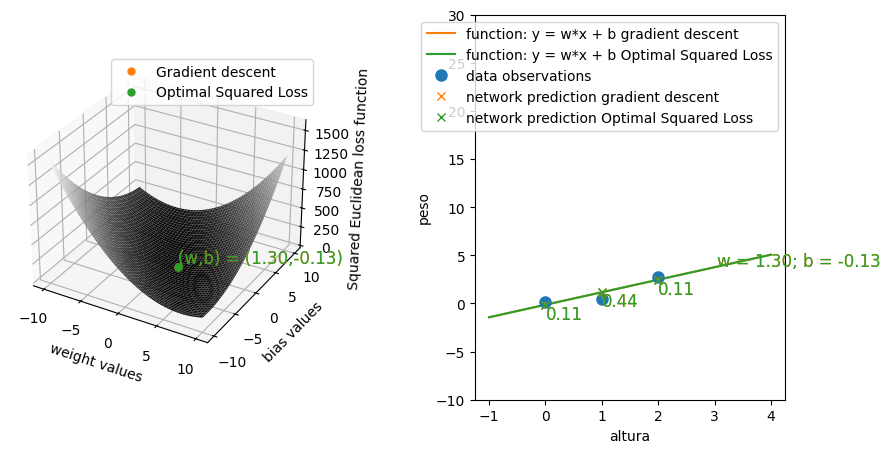

In [26]:
## draw loss function with optimal parameters
## ======================================================================================= ##
## display loss as a function of weight and bias parameter (loss incurred by each network) ##
## ======================================================================================= ##
## Let's see the associated loss to each possible function but seeing the loss
## as a function of the weight and bias parameter. 
## We show two different losses: squared (top) and absolute ( bottom )
loss_type = 'squared'

if loss_type not in ['absolute', 'squared']:
    raise RuntimeError("Invalid loss type choose from absolute or square")

## create figure box
fig = plt.figure(figsize = (10,5))
ax11 = fig.add_subplot(121, projection='3d')
ax12 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0.5)

## =====================================================================================
## Draw loss function with optimal parameter computed via gradient descent and optimally
## first of all draw loss function against a set of parameters

## To do so we need a mesh
w_mesh, b_mesh = np.meshgrid(
    np.linspace(cg.losses_named[loss_type].w_range_l_2d,cg.losses_named[loss_type].w_range_u_2d,cg.N_models_simulation),
    np.linspace(cg.losses_named[loss_type].b_range_l_2d,cg.losses_named[loss_type].b_range_u_2d,cg.N_models_simulation)
)

# reshape x_data and t_data for computations. t_data uses broadcasting.
x_data_expanded = x_data[:,np.newaxis]
t_data_expanded = t_data[:,np.newaxis]

# compute linear projection at all pairs of points
y_data_expanded = w_mesh*x_data_expanded + b_mesh

# compute loss
loss_acc_mesh = np.sum(cg.losses_named[loss_type].loss_fun(t_data_expanded, y_data_expanded), axis = 0)

## =============
## draw function

# reshape to match operation dimensions
w_opt = np.reshape(w_opt, (1,1))
b_opt = np.reshape(b_opt, (1,1))

## compute function at current parameter value
function_gd = computation_graph_linear(x_range, w_gd, b_gd)
function_opt = computation_graph_linear(x_range, w_opt, b_opt)

## compute predictions at current parameter value
y_data_gd = computation_graph_linear(x_data, w_gd, b_gd)
y_data_opt = computation_graph_linear(x_data, w_opt, b_opt)

## compute loss at current parameter value
loss_gd = cg.losses_named[loss_type].loss_fun(t_data, y_data_gd)
loss_opt = cg.losses_named[loss_type].loss_fun(t_data, y_data_opt)

loss_acc_gd = np.sum(loss_gd)
loss_acc_opt = np.sum(loss_opt)

# to plot
w_gd_plot = np.squeeze(w_gd)
b_gd_plot = np.squeeze(b_gd)
w_opt_plot = np.squeeze(w_opt)
b_opt_plot = np.squeeze(b_opt)
x_data_plot = np.squeeze(x_data)
t_data_plot = np.squeeze(t_data)
y_data_gd_plot = np.squeeze(y_data_gd)
y_data_opt_plot = np.squeeze(y_data_opt)
loss_gd_plot = np.squeeze(loss_gd)
loss_opt_plot = np.squeeze(loss_opt)
loss_acc_gd_plot = np.squeeze(loss_acc_gd)
loss_acc_opt_plot = np.squeeze(loss_acc_opt)

## ===================== ##
## loss function picture ##

## 1. display loss function
ax11.plot_surface(w_mesh, b_mesh, loss_acc_mesh, cmap = 'gray')
ax11.set_xlabel('weight values')
ax11.set_ylabel('bias values')
ax11.set_zlabel(f'{cg.losses_named[loss_type].loss_name} loss function')

## 2. display current weight
ax11.plot(w_gd_plot, b_gd_plot, loss_acc_gd_plot, 'o', color = 'C1', label = 'Gradient descent', zorder = 50, markersize = 5)
ax11.text(w_gd_plot, b_gd_plot, loss_acc_gd_plot, f"(w,b) = ({w_gd_plot:.2f},{b_gd_plot:.2f})", fontsize=12, va='bottom', color = f"C1" , zorder = 50)

ax11.plot(w_opt_plot, b_opt_plot, loss_acc_opt_plot, 'o', color = 'C2', label = 'Optimal Squared Loss', zorder = 50, markersize = 5)
ax11.text(w_opt_plot, b_opt_plot, loss_acc_opt_plot, f"(w,b) = ({w_gd_plot:.2f},{b_gd_plot:.2f})", fontsize=12, va='bottom', color = f"C2" , zorder = 50)
ax11.legend()

## ================ ##
## function picture ##
ax12.plot(x_range,function_gd, color = 'C1', label = 'function: y = w*x + b gradient descent')
ax12.plot(x_range,function_opt, color = 'C2', label = 'function: y = w*x + b Optimal Squared Loss')
ax12.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')


## plot squared loss associated at each point and draw line between dots to highliht what the loss measures
for idx, (xi, ti, yi_gd, yi_opt, sl_gd, sl_opt) in enumerate(zip(x_data_plot,t_data_plot,y_data_gd_plot,y_data_opt_plot,loss_gd_plot, loss_opt_plot)):
    if idx == 0:
        ax12.plot(xi,yi_gd, 'x', color = 'C1', label = 'network prediction gradient descent')
        ax12.plot(xi,yi_opt, 'x', color = 'C2', label = 'network prediction Optimal Squared Loss')
    else:
        ax12.plot(xi,yi_gd, 'x', color = 'C1')
        ax12.plot(xi,yi_opt, 'x', color = 'C2')
        
    ax12.plot([xi,xi], [ti, yi_gd], '--',color = f"C1", alpha = 0.5)
    ax12.text(xi, yi_gd, f'{sl_gd:.2f}', fontsize=12, va='top', color = f"C1" ) 
    
    ax12.plot([xi,xi], [ti, yi_opt], '--',color = f"C2", alpha = 0.5)
    ax12.text(xi, yi_opt, f'{sl_opt:.2f}', fontsize=12, va='top', color = f"C2" ) 

# label function with the weight at that moment
ax12.text(x_range[-20],function[-20], f'w = {w_gd_plot:.2f}; b = {b_gd_plot:.2f}', color = 'C1', fontsize = 12)
ax12.text(x_range[-20],function[-20], f'w = {w_opt_plot:.2f}; b = {b_opt_plot:.2f}', color = 'C2', fontsize = 12)
ax12.set_xlabel(cg.data_x_name)
ax12.set_ylabel(cg.data_y_name)
ax12.set_ylim([cg.data_y_lim_l_gd_pred_fun,cg.data_y_lim_u_gd_pred_fun])
ax12.legend()
    

**Question:** ¿Does the optimal linear model when using the squared loss coincides with the optimal linear model when using the absolute loss?

## TODO
 
* parameter sharing
* linear regresion from R2 to R
* polinomial regression
* regularization